# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
%load_ext dotenv
%dotenv 

# Add src to path
import os
import sys
import pandas as pd
#import warnings
#warnings.filterwarnings("ignore")


# 1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# 2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# 3. month - month of the year: "jan" to "dec" 
# 4. day - day of the week: "mon" to "sun"
# 5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
# 6. DMC - DMC index from the FWI system: 1.1 to 291.3 
# 7. DC - DC index from the FWI system: 7.9 to 860.6 
# 8. ISI - ISI index from the FWI system: 0.0 to 56.10
# 9. temp - temperature in Celsius degrees: 2.2 to 33.30
# 10. RH - relative humidity in %: 15.0 to 100
# 11. wind - wind speed in km/h: 0.40 to 9.40 
# 12. rain - outside rain in mm/m2 : 0.0 to 6.4 
# 13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]

fire_data_file = os.getenv("FIRE_DATA")
fires_dt = (pd.read_csv(fire_data_file, header = 0, names = columns))
fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [2]:

fires_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [3]:
fires_dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Get X and Y

Create the features data frame and target data.

In [4]:
X = fires_dt.drop(columns='area')
Y = fires_dt['area']

num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = ['month', 'day']

display(X)


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


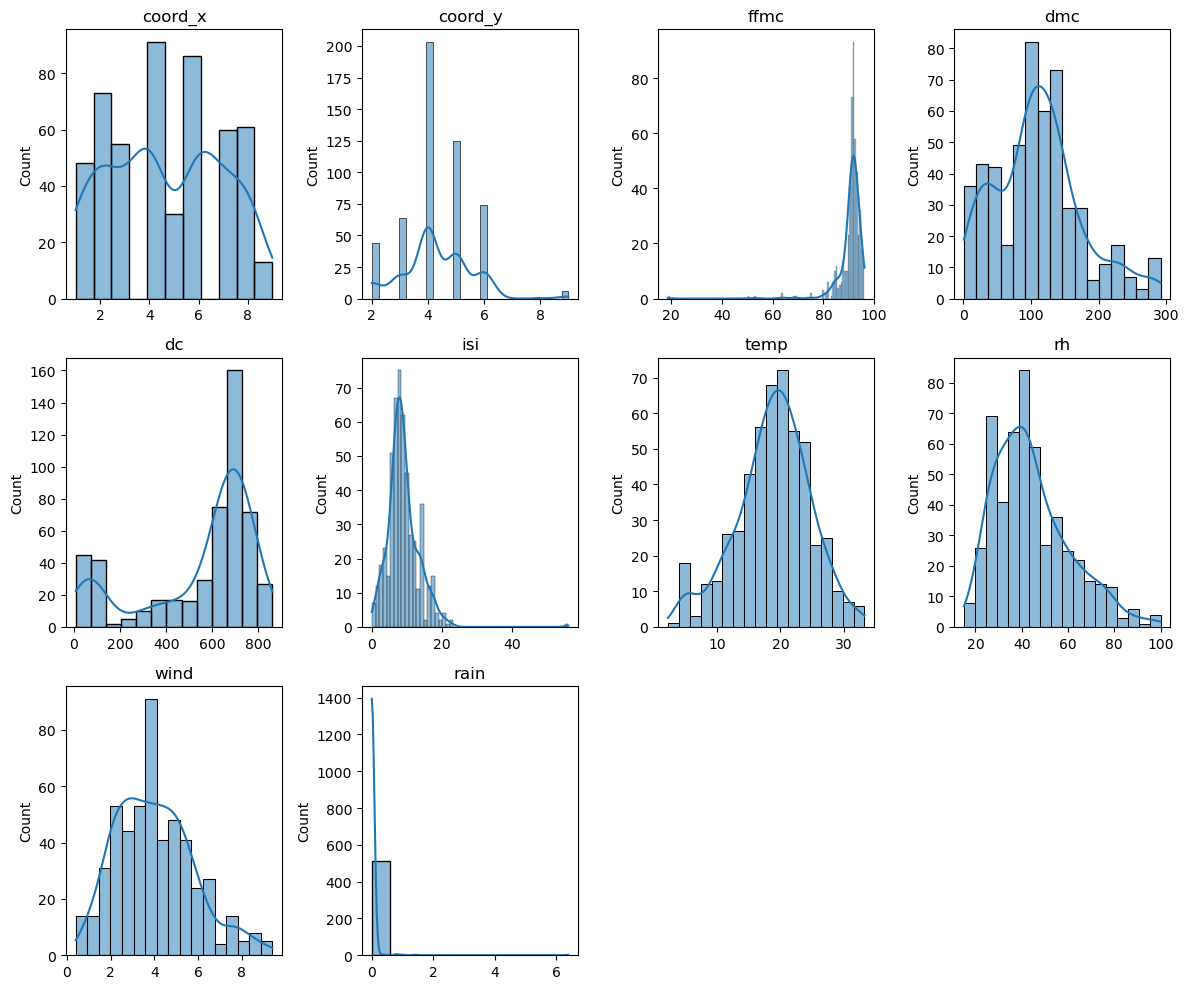

In [5]:
# The following code only looks as
import seaborn as sns
import matplotlib.pyplot as plt

def drawHistogram(X, num_cols):
    #print(X)
    #print(num_cols)
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(num_cols):
        plt.subplot(3, 4, i + 1)  # Adjust subplot layout as per your data
        sns.histplot(X[col], kde=True)
        plt.title(col)
        plt.xlabel('')
    plt.tight_layout()
    plt.show()

drawHistogram(X, num_cols)

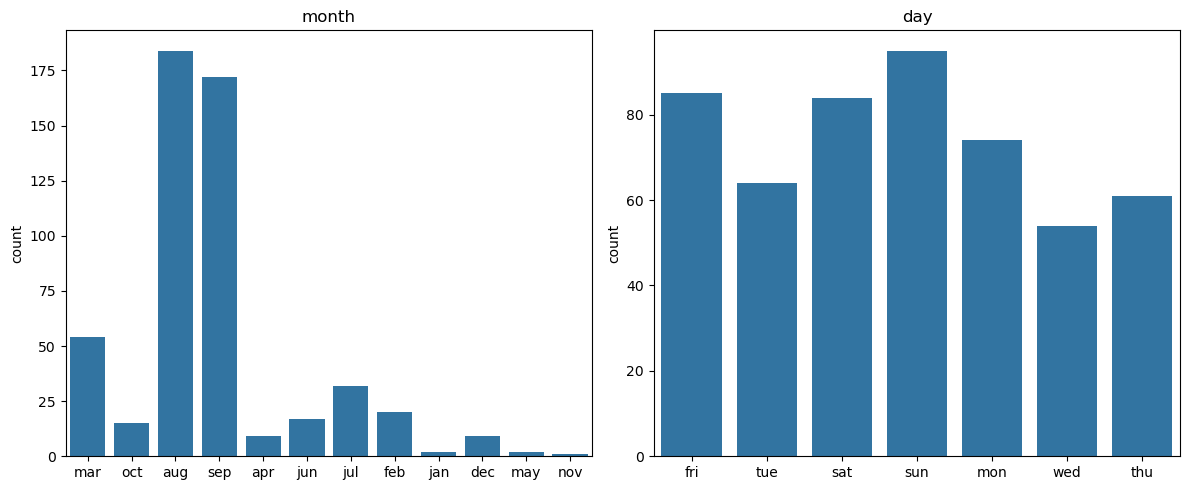

In [6]:
# Plotting countplots for categorical variables
plt.figure(figsize=(12, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(data=X[cat_cols], x=col)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [7]:
# preproc1
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

pipe_num_1 = Pipeline([
                        ('standardizer', StandardScaler()),
                    ])
pipe_cat_1 = Pipeline([
                        ('one_hot', OneHotEncoder(handle_unknown='ignore')),
                    ])
preproc1 = ColumnTransformer([
                            ('num_transforms', pipe_num_1, num_cols),
                            ('cat_transforms', pipe_cat_1, cat_cols), 
                            ])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [8]:
# preproc2
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, RobustScaler

pipe_num_2 = Pipeline([
                        ('standardizer', StandardScaler()),                        
                        ('non-linear-transform', PowerTransformer()),                        
                    ])

pipe_cat_2 = Pipeline([
                        ('one_hot', OneHotEncoder(handle_unknown='ignore')),
                    ])
preproc2 = ColumnTransformer([
                            ('num_transforms', pipe_num_2, num_cols),
                            ('cat_transforms', pipe_cat_2, cat_cols)
                            ])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [9]:
# Pipeline A = preproc1 + baseline
from sklearn.linear_model import ElasticNet


pipeline_A = Pipeline([
                        ('preprocessing', preproc1),
                        ('regressor', ElasticNet(random_state=42))
                        ])
pipeline_A

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', ElasticNet(random_state=42))])

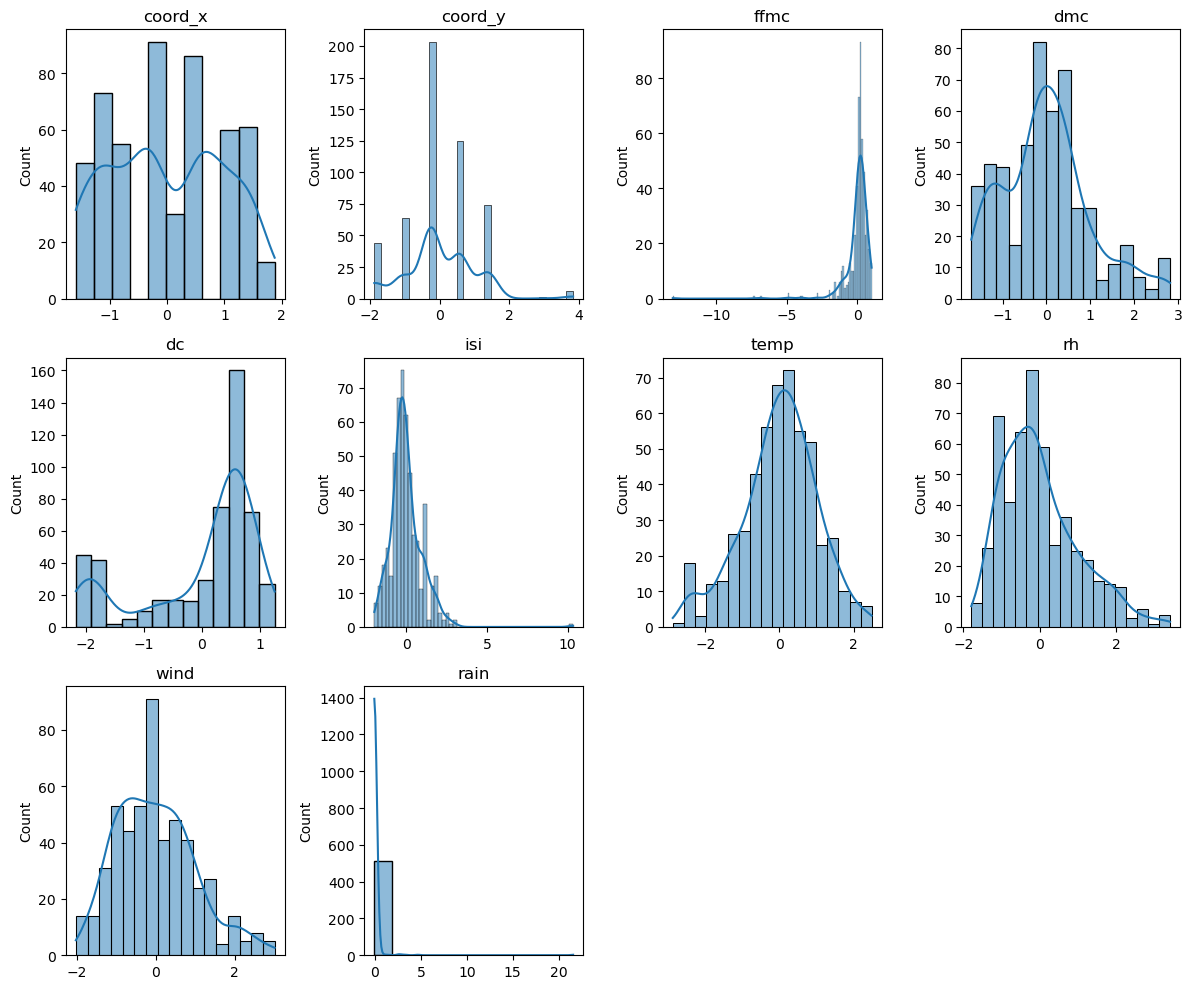

In [10]:
# This is a helper method to see the histogram of transformed data to get a better understanding of 
# distribution of data
def display_transformed_data(pipeline):
    transformed_data = pipeline['preprocessing'].fit_transform(X)
    transformed_column_names = num_cols + list(pipeline['preprocessing'].named_transformers_['cat_transforms']['one_hot'].get_feature_names_out())
    # Create DataFrame with transformed data and column names
    transformed_df = pd.DataFrame(transformed_data, columns=transformed_column_names)
    drawHistogram(pd.DataFrame(transformed_df), num_cols)

display_transformed_data(pipeline_A)


The graphs show how data will look like when its will be standardized in the pipeline A

In [11]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
                        ('preprocessing', preproc2),
                        ('regressor', ElasticNet(random_state=42))
                        ])
pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler()),
                                                                  ('non-linear-transform',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', ElasticNet(random_state=42))])

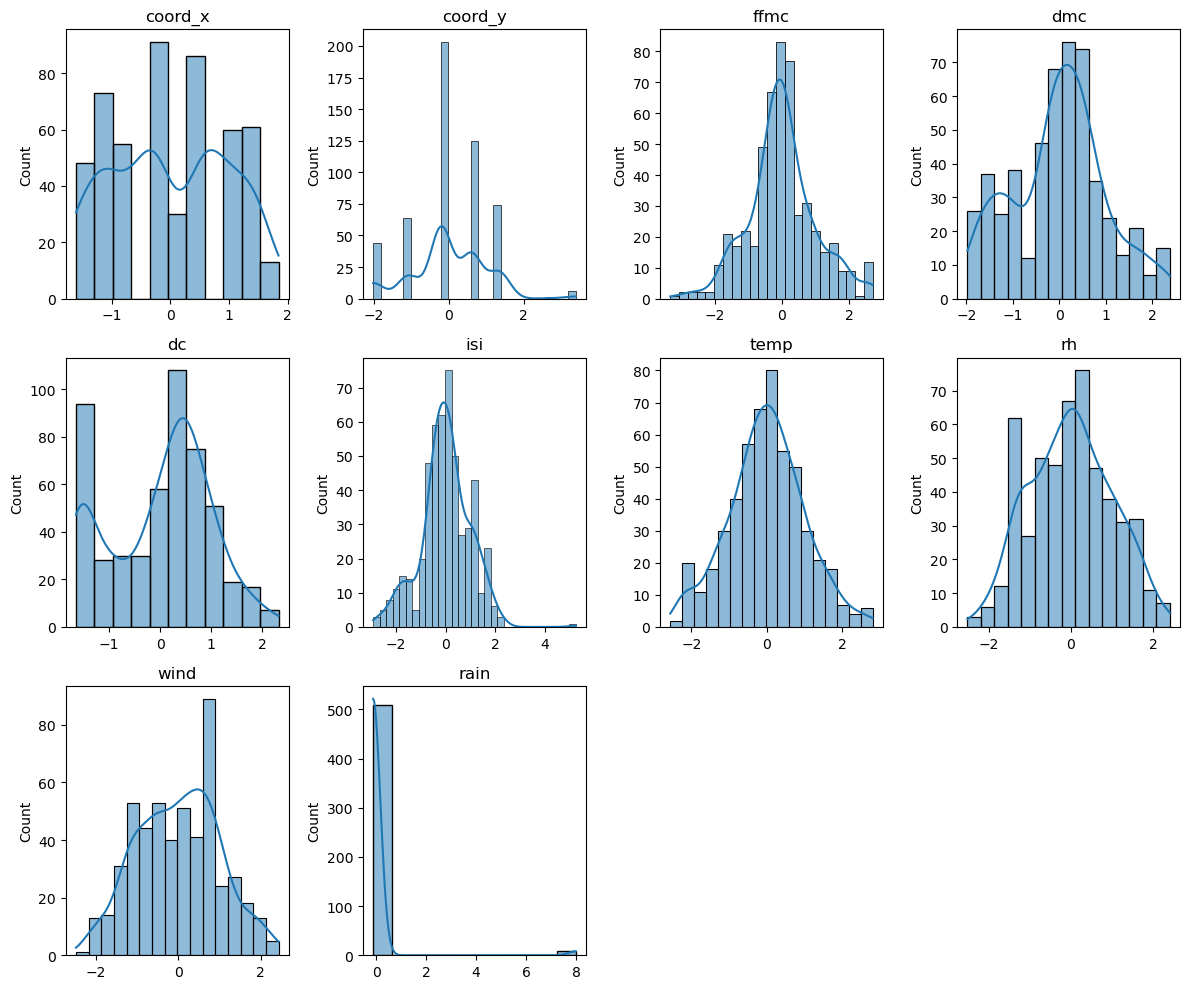

In [12]:
display_transformed_data(pipeline_B)

The graphs show how data will look like when it will be standardized and transformed using yeo-johnson algorithm in the pipeline

In [13]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor
pipeline_C = Pipeline([
                        ('preprocessing', preproc1),
                        ('regressor', RandomForestRegressor(random_state=42))
                        ])
pipeline_C

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [14]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
                        ('preprocessing', preproc2),
                        ('regressor', RandomForestRegressor(random_state=42))
                        ])
pipeline_D

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler()),
                                                                  ('non-linear-transform',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

#### Cross vaidation on different pipelines without tuning

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
scoring = ['max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error']

cross_test = cross_validate(pipeline_A, X, Y, cv = 5, return_train_score=True, scoring = scoring)
pd.DataFrame(cross_test).mean()

fit_time                                0.056801
score_time                              0.015150
test_max_error                       -405.541267
train_max_error                      -995.924544
test_neg_mean_absolute_error          -19.999564
train_neg_mean_absolute_error         -18.477552
test_neg_mean_squared_error         -4137.876682
train_neg_mean_squared_error        -3934.429326
test_neg_root_mean_squared_error      -49.624144
train_neg_root_mean_squared_error     -61.727116
dtype: float64

In [16]:
cross_test = cross_validate(pipeline_B, X, Y, cv = 5, return_train_score=True, scoring = scoring)
pd.DataFrame(cross_test).mean()

fit_time                                0.068854
score_time                              0.014043
test_max_error                       -405.643059
train_max_error                      -995.122298
test_neg_mean_absolute_error          -19.977439
train_neg_mean_absolute_error         -18.409009
test_neg_mean_squared_error         -4132.276108
train_neg_mean_squared_error        -3928.876751
test_neg_root_mean_squared_error      -49.629490
train_neg_root_mean_squared_error     -61.687900
dtype: float64

In [17]:
cross_test = cross_validate(pipeline_C, X, Y, cv = 5, return_train_score=True, scoring = scoring)
pd.DataFrame(cross_test).mean()

fit_time                                1.023839
score_time                              0.033448
test_max_error                       -455.192928
train_max_error                      -365.485480
test_neg_mean_absolute_error          -25.537202
train_neg_mean_absolute_error          -8.334678
test_neg_mean_squared_error         -4834.846798
train_neg_mean_squared_error         -689.357184
test_neg_root_mean_squared_error      -60.160047
train_neg_root_mean_squared_error     -25.761141
dtype: float64

In [18]:
cross_test = cross_validate(pipeline_D, X, Y, cv = 5, return_train_score=True, scoring = scoring)
pd.DataFrame(cross_test).mean()

fit_time                                1.160275
score_time                              0.034172
test_max_error                       -454.228468
train_max_error                      -366.792540
test_neg_mean_absolute_error          -25.630651
train_neg_mean_absolute_error          -8.295842
test_neg_mean_squared_error         -4852.318574
train_neg_mean_squared_error         -690.187087
test_neg_root_mean_squared_error      -60.367677
train_neg_root_mean_squared_error     -25.767739
dtype: float64

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [55]:
from sklearn.model_selection import GridSearchCV


# This is the helper method that calls GridSearchCV for a pipeline using the parameter grid passed 
# to it. It also prints the best parameters, results and best scores
# It is used to tune all four pipelines
def perform_grid_search(pipeline, param_grid, scoring):
    
    print("Default parameters of model:", pipeline.named_steps['regressor'].get_params())    
    grid_cv = GridSearchCV(
                            estimator =  pipeline,
                            param_grid = param_grid,
                            scoring = scoring,
                            cv = 5,
                            refit = 'neg_mean_absolute_error'                                       
                        )
    # fit the grid and get results
    grid_cv.fit(X_train, Y_train)    

    result = pd.DataFrame(grid_cv.cv_results_)
    result_df = result[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',                        
                        'mean_test_max_error', 'std_test_max_error', 'rank_test_max_error', 
                        'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_error',     
                        'mean_test_neg_root_mean_squared_error', 'std_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error', 
                        ]]       
    
    print("Best tuning parameters", grid_cv.best_params_)    
    print("Best score of neg_mean_absolute_error", grid_cv.best_score_)
    display(result_df.sort_values("rank_test_neg_mean_absolute_error").head())
    
    return grid_cv



# Param grid for ElasticNet Regression (Pipelines A and B)
param_grid = {
                'regressor__alpha': [0.1, 1.0, 10.0],
                'regressor__l1_ratio': [0.2, 0.5, 0.8, 1.0],        
             }

###### Pipeline A ##########
grid_cv_A = perform_grid_search(pipeline_A, param_grid, scoring)


Default parameters of model: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Best tuning parameters {'regressor__alpha': 10.0, 'regressor__l1_ratio': 0.2}
Best score of neg_mean_absolute_error -15.701332395665037


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_max_error,std_test_max_error,rank_test_max_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
8,0.020978,0.004346,0.014209,0.000894,-281.918419,236.760162,9,-15.701332,3.235900,1,-38.509360,24.694498,1
9,0.067479,0.021139,0.034625,0.026358,-282.235686,236.834469,10,-15.726739,3.205668,2,-38.570268,24.688964,2
10,0.024941,0.009107,0.015823,0.000543,-282.311400,236.795955,11,-15.734796,3.200123,3,-38.583194,24.681460,3
11,0.018258,0.002727,0.012172,0.005665,-282.311400,236.795955,11,-15.734796,3.200123,3,-38.583194,24.681460,3
5,0.017386,0.001629,0.014212,0.001208,-279.062262,235.345834,5,-16.080766,3.372984,5,-38.723032,24.278430,5


In [56]:
###### Pipeline B ##########
# print the best parameters and estimator for pipeline_B
grid_cv_B = perform_grid_search(pipeline_B, param_grid, scoring)


Default parameters of model: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Best tuning parameters {'regressor__alpha': 10.0, 'regressor__l1_ratio': 0.2}
Best score of neg_mean_absolute_error -15.703301271622243


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_max_error,std_test_max_error,rank_test_max_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
8,0.049285,0.003301,0.016936,0.002387,-281.980064,236.763908,9,-15.703301,3.227623,1,-38.520821,24.688883,1
9,0.061688,0.005417,0.009693,0.005068,-282.246349,236.827234,10,-15.729219,3.203856,2,-38.572354,24.687701,2
10,0.050140,0.005619,0.018474,0.005117,-282.311400,236.795955,11,-15.734796,3.200123,3,-38.583194,24.681460,3
11,0.056970,0.010587,0.013180,0.006756,-282.311400,236.795955,11,-15.734796,3.200123,3,-38.583194,24.681460,3
4,0.075928,0.007410,0.013839,0.000913,-280.325658,234.734528,8,-15.928789,3.355716,5,-38.616705,24.336067,6


In [57]:
# Param grid for RandomForestRegressor (Pipelines C and D)
param_grid = {
        'regressor__n_estimators': [10, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__max_features': [None, 'sqrt', 'log2'],      
        }

###### Pipeline C ##########
grid_cv_C = perform_grid_search(pipeline_C, param_grid, scoring)


Default parameters of model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best tuning parameters {'regressor__max_depth': 10, 'regressor__max_features': 'log2', 'regressor__n_estimators': 100}
Best score of neg_mean_absolute_error -17.493046927911116


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_max_error,std_test_max_error,rank_test_max_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
16,0.542355,0.094341,0.042730,0.007606,-305.811501,222.512261,15,-17.493047,3.420439,1,-43.561679,22.170188,2
7,0.364168,0.013184,0.026662,0.009160,-299.311860,223.806357,3,-17.706952,3.444430,2,-43.187934,21.930986,1
8,0.704712,0.018459,0.032656,0.002713,-305.070810,221.294908,14,-17.782626,3.387937,3,-43.698558,21.877441,4
6,0.051652,0.005586,0.016300,0.001045,-303.247200,218.413334,10,-17.790884,2.618425,4,-45.296464,19.862701,15
17,0.837973,0.100208,0.040546,0.005325,-308.212091,219.345126,20,-17.808192,3.340461,5,-43.792047,21.847926,7


In [58]:
###### Pipeline D ##########
grid_cv_D = perform_grid_search(pipeline_D, param_grid, scoring)


Default parameters of model: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Best tuning parameters {'regressor__max_depth': None, 'regressor__max_features': 'log2', 'regressor__n_estimators': 10}
Best score of neg_mean_absolute_error -17.40557309628759


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_max_error,std_test_max_error,rank_test_max_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
6,0.105551,0.005383,0.017784,0.005000,-304.989200,217.288390,13,-17.405573,2.566845,1,-45.183017,19.654710,15
24,0.101965,0.003943,0.022450,0.005854,-304.989200,217.288390,13,-17.429985,2.568268,2,-45.213648,19.637347,16
16,0.435893,0.026238,0.034738,0.003576,-305.993393,222.153233,16,-17.525120,3.498260,3,-43.590939,22.143572,4
7,0.413258,0.012814,0.031276,0.004690,-299.276140,223.237614,3,-17.642789,3.457105,4,-43.043900,21.909830,1
8,0.794129,0.023664,0.043880,0.006789,-304.233510,221.692956,12,-17.752759,3.451184,5,-43.524157,21.938279,3


# Evaluate

+ Which model has the best performance?


The best selected model pipeline (Pipeline D) with its parameters is displayed below. Tuned Pipeline D uses RandomForestRegressor (max_depth'=None, 'max_features'='log2', 'n_estimators'=10) with preprocessing steps that incorporate StandardScaler and PowerTransformer for numerical data, alongside OneHotEncoder for categorical data.

While the model's overall performance is modest, it demonstrates improved accuracy in predicting smaller fire areas. The zoomed-in graph displaying predicted versus actual values using the refined Pipeline D is displayed below.

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler()),
                                                                  ('non-linear-transform',
                                                                   PowerTransformer())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['month', 'day'])])),
                ('regressor',
                 RandomForestRegressor(max_features='log2', n_estimators=10,
                                       random_state=42))])

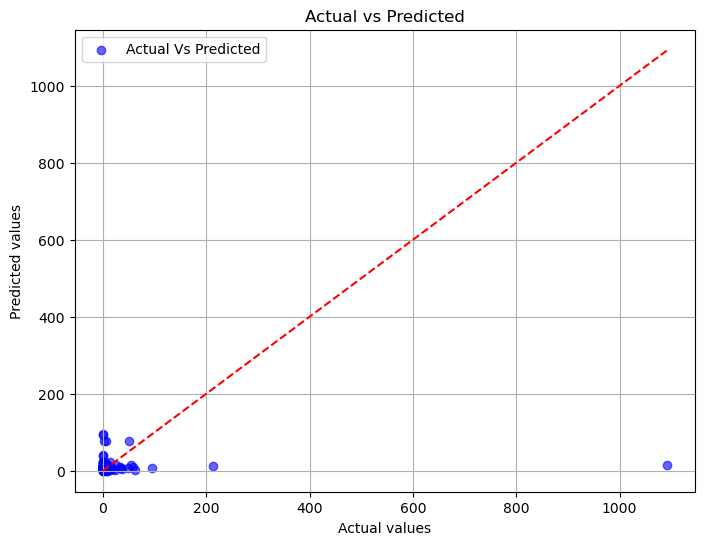

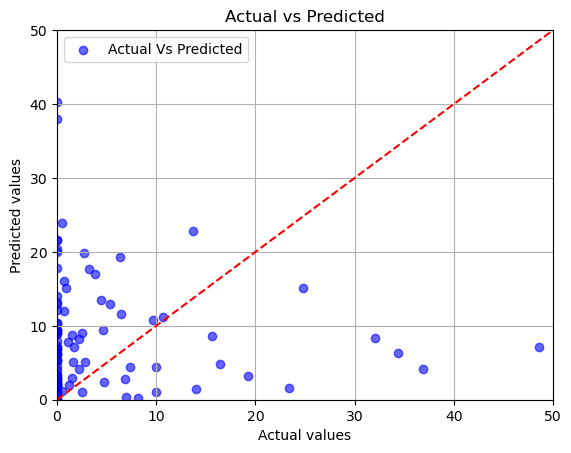

In [59]:
from sklearn.inspection import PartialDependenceDisplay

best_estimated_pipeline = grid_cv_D.best_estimator_
display(best_estimated_pipeline)

best_estimated_pipeline.fit(X_train, Y_train)
Y_predicted = best_estimated_pipeline.predict(X_test)
# Plotting actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_predicted, color='blue', label='Actual Vs Predicted', alpha=0.6)

# Plotting y = x line for reference (optional)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')  # Diagonal line

plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

# zoom in on smaller areas
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.scatter(Y_test, Y_predicted, color='blue', label='Actual Vs Predicted', alpha=0.6)
# Plotting y = x line for reference (optional)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid(True)
plt.legend()
plt.show()

In [68]:
# corss validation on the test data with selected tuned model
cross_test = cross_validate(best_estimated_pipeline, X_test, Y_test, cv = 10, return_train_score=True, scoring = scoring)
pd.DataFrame(cross_test).mean()

fit_time                                 0.085312
score_time                               0.015683
test_max_error                        -259.211000
train_max_error                       -242.684100
test_neg_mean_absolute_error           -42.237462
train_neg_mean_absolute_error          -12.175046
test_neg_mean_squared_error         -15667.796887
train_neg_mean_squared_error         -1398.748080
test_neg_root_mean_squared_error       -89.242577
train_neg_root_mean_squared_error      -35.269371
dtype: float64

# Export

+ Save the best performing model to a pickle file.

In [60]:
import pickle

# Writind the best model to model_assignment_3.pkl file
artifacts_dir = os.getenv('ARTIFACTS_DIR')
os.makedirs(artifacts_dir, exist_ok=True)
    
pkl_filename = os.path.join(artifacts_dir, "model_assignment_3.pkl")    
with open(pkl_filename, 'wb') as f:
    pickle.dump(best_estimated_pipeline, f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

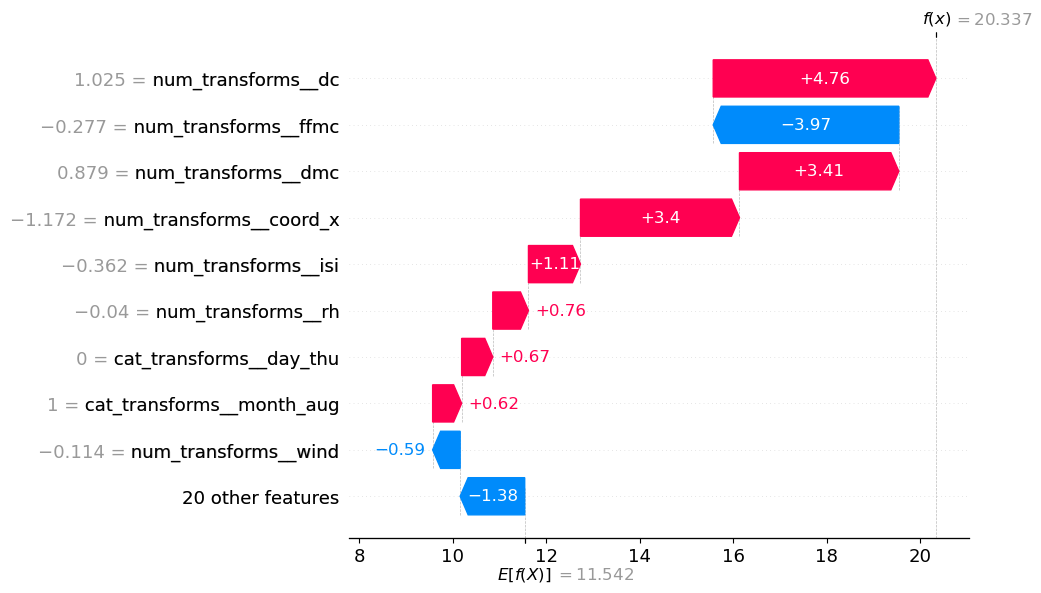

In [61]:
import shap

pipe=best_estimated_pipeline
pipe.fit(X_train, Y_train)
data_transform = pipe.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.Tree(
                                    pipe.named_steps['regressor'], 
                                    data_transform,
                                    feature_names = pipe.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform)

shap.plots.waterfall(shap_values[10])

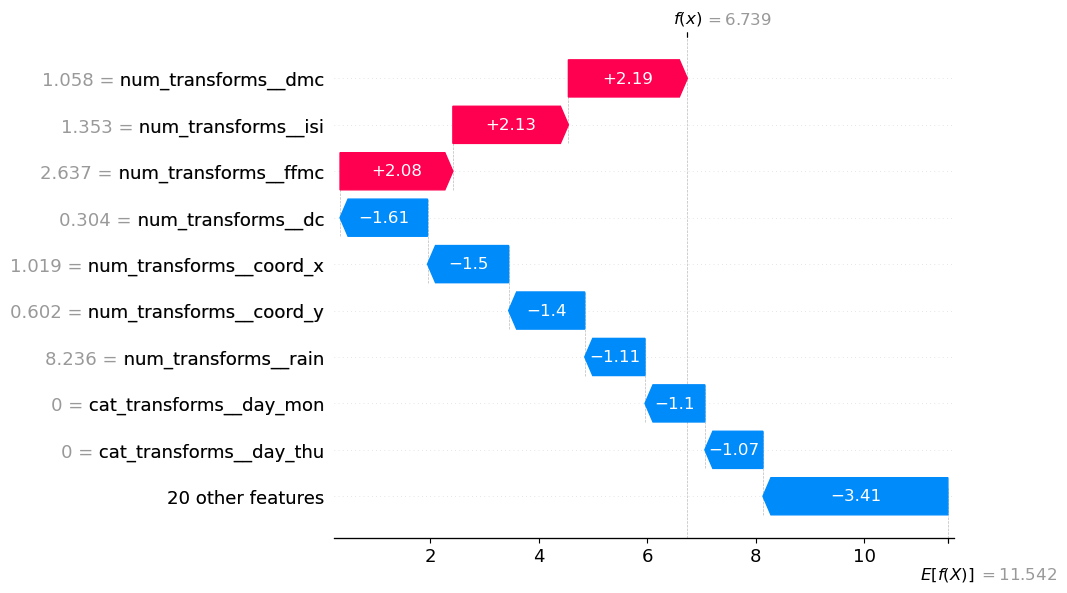

In [62]:
shap.plots.waterfall(shap_values[1])

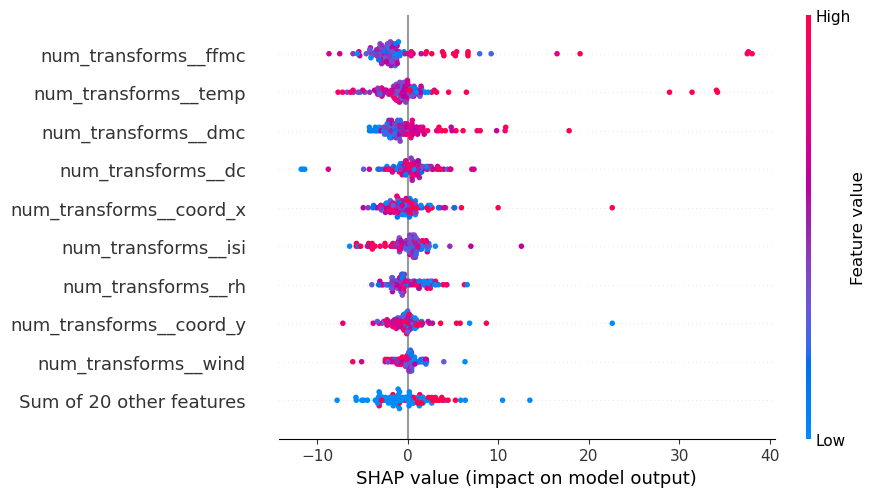

In [63]:
shap.plots.beeswarm(shap_values)

In [64]:
from sklearn.inspection import permutation_importance
pi_res = permutation_importance(
                                best_estimated_pipeline, X_test, Y_test, 
                                n_repeats=30, 
                                scoring = "neg_mean_absolute_error")
pd.concat(
    [
        pd.Series(pi_res.importances_mean, index = X_test.columns, name = 'Mean Importance'),
        pd.Series(pi_res.importances_std, index = X_test.columns, name = "Std Importance")
    ], 
    axis = 1).sort_values("Mean Importance", ascending  = False)

,Mean Importance,Std Importance
isi,1.421797,0.522442
dc,1.239680,0.803316
day,1.031974,0.577606
rh,0.565013,0.415821
month,0.487981,0.459015
rain,0.025275,0.028508
dmc,-0.073359,0.461440
wind,-0.082767,0.272370
coord_y,-0.098535,0.729468
temp,-0.372273,0.779640


Based on observations from indices 1 and 10 of the Shap values for the test data predicted using the best selected model, I have identified that 'ffmc', 'dmc', 'temp', and 'coord_x' are crucial features to retain. Conversely, 'day' ranks as the least important feature, with 'month' following suit.

We can evaluate if the selected features improve the model's performance compared to using all features. Train the model using only the selected features and assess its performance using either a dedicated test set or cross-validation. Additionally, we can also try feature selection techniques (refer to https://scikit-learn.org/stable/modules/feature_selection.html) to explore this further.


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.